## Exercise 3.2
###### Consider three cell averages: $\langle f\rangle_{i-1},\langle f\rangle_i,\langle f\rangle_{i+1}$. Fit a quadratic polynomial through these points, $$f(x)=A\left(x-x_i\right)^2+B\left(x-x_i\right)+C$$ where the coefficients, $A, B$, and $C$ are found by applying the constraints: $$ \begin{aligned} \langle f\rangle_{i-1} & =\frac{1}{\Delta x} \int_{x_{i-3 / 2}}^{x_{i-1 / 2}} f(x) d x \\ \langle f\rangle_i & =\frac{1}{\Delta x} \int_{x_{i-1 / 2}}^{x_{i+1 / 2}} f(x) d x \\ \langle f\rangle_{i+1} & =\frac{1}{\Delta x} \int_{x_{i+1 / 2}}^{x_{i+3 / 2}} f(x) d x\end{aligned} $$ Show that the conservative interpolant is: $$ \begin{aligned} f(x)= & \frac{\langle f\rangle_{i-1}-2\langle f\rangle_i+\langle f\rangle_{i+1}}{2 \Delta x^2}\left(x-x_i\right)^2+ \\ & \frac{\langle f\rangle_{i+1}-\langle f\rangle_{i-1}}{2 \Delta x}\left(x-x_i\right)+ \\& \frac{-\langle f\rangle_{i-1}+26\langle f\rangle_i-\langle f\rangle_{i+1}}{24}\end{aligned}$$

## Quadratic
##### We want to construct a quadratic polynomal through that points, $x_{i-1}$, $x_i$, $x_{i+1}$, that gives the correct averages, $f_{i-1}$, $f_{i}$ and $f_{i+1}$ when when integrated over the volume, e.g. $$\frac{1}{\Delta x}\int_{x_{1-1/2}}^{x_{i+1/2}}f(x) \mathrm{d}x=f_i.$$ There are 3 unknowns in the quadratic and three constraints, so this is a linear system we can solve.

#### Define the quadratic polynomial

In [2]:
f[x_] = A (x - xi)^2 + B (x - xi) + C

2
C + B (x - xi) + A (x - xi)

#### Constraints
###### Define the 3 constraint equations---here we set them up construct $A$, $B$, and $C$ as the integrals over the 3 control volumes

3
                      2   13 A dx
           C dx - B dx  + --------
                             12
f       == -----------------------
 -1 + i              dx
                 3
             A dx
      C dx + -----
              12
f  == ------------
 i         dx
                                3
                     2   13 A dx
          C dx + B dx  + --------
                            12
f      == -----------------------
 1 + i              dx
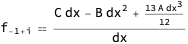
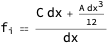
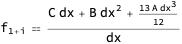

In [5]:
constraints1 = Subscript[f, i - 1] == Integrate[f[x], {x, xi - 3/2 dx, xi - 1/2 dx}]/dx
constraints2 = Subscript[f, i] == Integrate[f[x], {x, xi - 1/2 dx, xi + 1/2 dx}]/dx
constraints3 = Subscript[f, i + 1] == Integrate[f[x], {x, xi + 1/2 dx, xi + 3/2 dx}]/dx

2
     (x - xi) (f       - f     )   (x - xi)  (-f       + 2 f  - f     )
  1             -1 + i    1 + i                 -1 + i      i    1 + i
-(-) --------------------------- - ------------------------------------ + 
  2              dx                                   2
                                                  2 dx
 
    -f       + 26 f  - f
      -1 + i       i    1 + i
>   -------------------------
               24
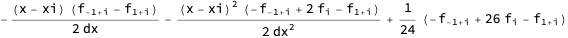

In [8]:
f[x] /. Solve[{constraints1, constraints2, constraints3}, {A, B, C}][[1]]

## Cubic
##### We want to construct a cubic polynomal through that points, $x_{i-2}$, $x_{i-1}$, $x_i$, $x_{i+1}$, that gives the correct averages, $f_{i-2}$, $f_{i-1}$, $f_{i}$ and $f_{i+1}$ when integrated over the volume of each zone

In [9]:
f[x_] = A (x - xi)^3 + B (x - xi)^2 + C (x - xi) + D

2             3
D + C (x - xi) + B (x - xi)  + A (x - xi)

3          4
                        2   49 B dx    17 A dx
           D dx - 2 C dx  + -------- - --------
                               12         2
f       == ------------------------------------
 -2 + i                     dx
                                 3         4
                      2   13 B dx    5 A dx
           D dx - C dx  + -------- - -------
                             12         4
f       == ---------------------------------
 -1 + i                   dx
                 3
             B dx
      D dx + -----
              12
f  == ------------
 i         dx
                                3         4
                     2   13 B dx    5 A dx
          D dx + C dx  + -------- + -------
                            12         4
f      == ---------------------------------
 1 + i                   dx
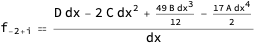
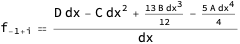
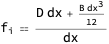
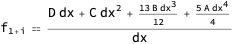

In [10]:
constraints1 = Subscript[f, i - 2] == Integrate[f[x], {x, xi - 5/2 dx, xi - 3/2 dx}]/dx
constraints2 = Subscript[f, i - 1] == Integrate[f[x], {x, xi - 3/2 dx, xi - 1/2 dx}]/dx
constraints3 = Subscript[f, i] == Integrate[f[x], {x, xi - 1/2 dx, xi + 1/2 dx}]/dx
constraints4 = Subscript[f, i + 1] == Integrate[f[x], {x, xi + 1/2 dx, xi + 3/2 dx}]/dx

(x - xi) (-5 f       + 27 f       - 15 f  - 7 f     )
  1                 -2 + i       -1 + i       i      1 + i
-(--) ----------------------------------------------------- - 
  24                           dx
 
            2
    (x - xi)  (-f       + 2 f  - f     )
                 -1 + i      i    1 + i
>   ------------------------------------ - 
                       2
                   2 dx
 
            3
    (x - xi)  (f       - 3 f       + 3 f  - f     )   -f       + 26 f  - f
                -2 + i      -1 + i      i    1 + i      -1 + i       i    1 + i
>   ----------------------------------------------- + -------------------------
                             3                                   24
                         6 dx
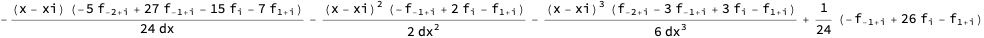

In [14]:
f[x] /. Solve[{constraints1, constraints2, constraints3, constraints4}, {A, B, C, D}][[1]]